In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data file
balance_data=pd.read_csv('loan_data_final.csv',sep=',',header=0)

In [3]:
print("Dataset Length:", len(balance_data))
print("Dataset Shape:", balance_data.shape)

Dataset Length: 9578
Dataset Shape: (9578, 14)


In [4]:
print("Dataset::")
print(balance_data.head())

Dataset::
   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1           all_other    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1           all_other    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0  

In [5]:
le = LabelEncoder()
balance_data['purpose'] = le.fit_transform(balance_data['purpose'])

In [6]:
x = balance_data.iloc[:, 1:5].values  # Features (columns 1 to 4)
y = balance_data.iloc[:, 0].values    # Target variable (column 0)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [8]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [9]:
y_pred_en = clf_entropy.predict(x_test)

In [10]:
print("Predictions:", y_pred_en)
print("Accuracy:", accuracy_score(y_test, y_pred_en) * 100)

Predictions: [1 1 1 ... 1 1 1]
Accuracy: 80.48016701461378


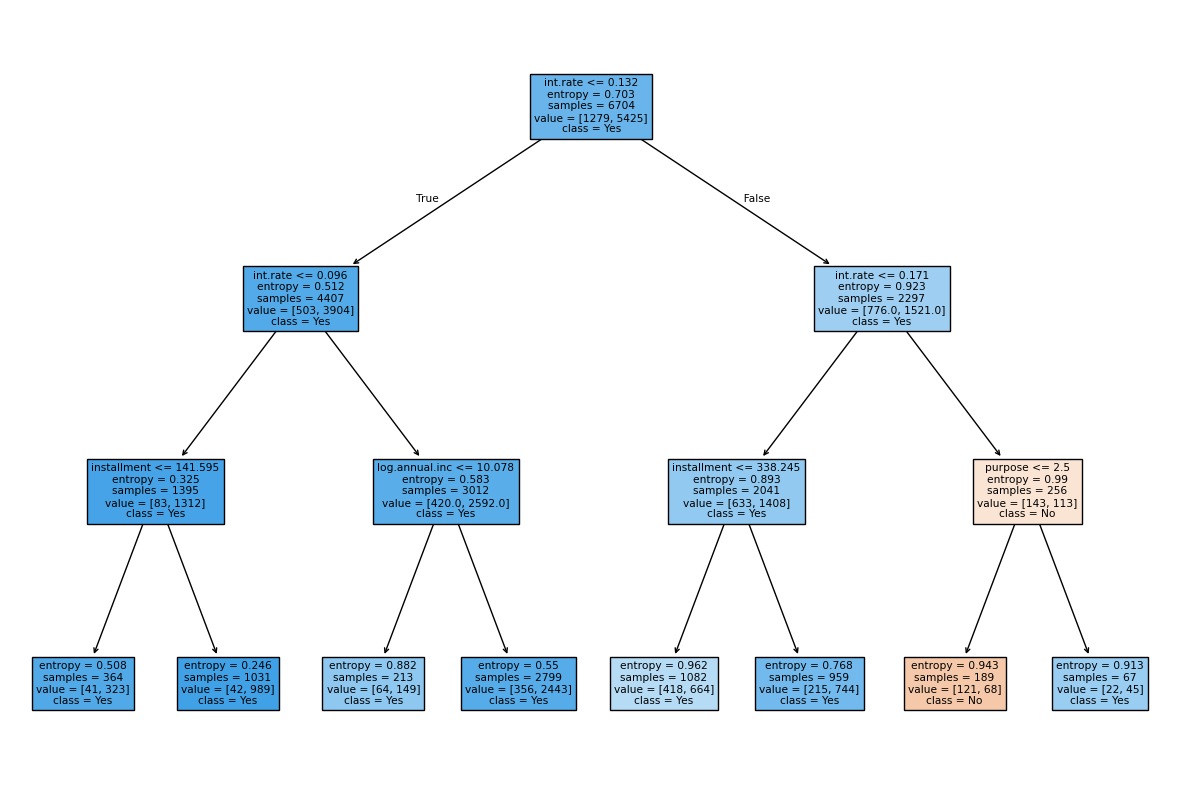

In [11]:
plt.figure(figsize=(15,10))
plot_tree(clf_entropy, filled=True, feature_names=balance_data.columns[1:5], class_names=['No', 'Yes'])
plt.show()

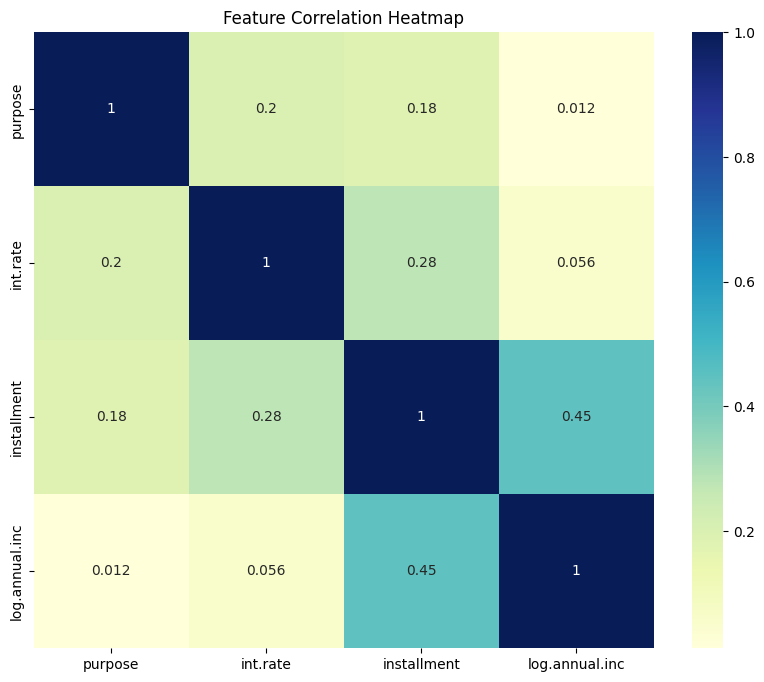

In [12]:
plt.figure(figsize=(10,8))
correlation_matrix = balance_data.iloc[:, 1:5].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title('Feature Correlation Heatmap')
plt.show()


In [13]:
print("Accuracy:",accuracy_score(y_test,y_pred_en)*100)

Accuracy: 80.48016701461378
